<a href="https://colab.research.google.com/github/pragyakhanna11/Cat-Dog-Classifier/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat vs. Dog Image Classification


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploring the Data

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

What the filenames look like in the `cats` and `dogs` `train` directories:

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.241.jpg', 'cat.463.jpg', 'cat.358.jpg', 'cat.383.jpg', 'cat.707.jpg', 'cat.360.jpg', 'cat.204.jpg', 'cat.121.jpg', 'cat.254.jpg', 'cat.527.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


For both cats and dogs, we have 1,000 training images and 500 test images.

Now we'll take a look at few of the images that we have

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

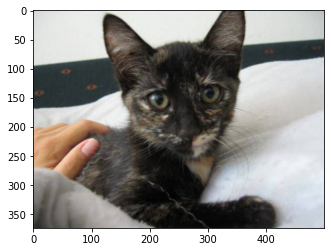

In [ ]:
img = mpimg.imread(train_cats_dir+'/cat.109.jpg')
plt.imshow(img)

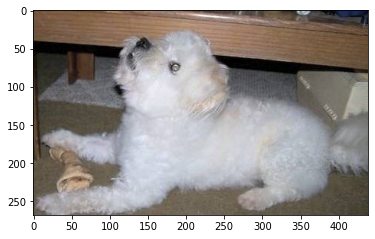

In [ ]:
img = mpimg.imread(train_dogs_dir+'/dog.109.jpg')
plt.imshow(img)

## Building the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Let's summarize the model architecture:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training
Training all 2,000 images available, for 30 epochs, and validating on all 1,000 validation images.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
100/100 - 32s - loss: 0.9340 - accuracy: 0.4910 - val_loss: 0.7113 - val_accuracy: 0.5420 - 32s/epoch - 317ms/step
Epoch 2/30
100/100 - 16s - loss: 0.7106 - accuracy: 0.5265 - val_loss: 0.7100 - val_accuracy: 0.5410 - 16s/epoch - 160ms/step
Epoch 3/30
100/100 - 16s - loss: 0.7109 - accuracy: 0.5205 - val_loss: 0.7093 - val_accuracy: 0.5140 - 16s/epoch - 160ms/step
Epoch 4/30
100/100 - 16s - loss: 0.7080 - accuracy: 0.5185 - val_loss: 0.7062 - val_accuracy: 0.5950 - 16s/epoch - 160ms/step
Epoch 5/30
100/100 - 16s - loss: 0.7053 - accuracy: 0.5485 - val_loss: 0.7045 - val_accuracy: 0.5770 - 16s/epoch - 158ms/step
Epoch 6/30
100/100 - 16s - loss: 0.7042 - accuracy: 0.5380 - val_loss: 0.7008 - val_accuracy: 0.6090 - 16s/epoch - 162ms/step
Epoch 7/30
100/100 - 16s - loss: 0.7037 - accuracy: 0.5320 - val_loss: 0.7037 - val_accuracy: 0.5530 - 16s/epoch - 159ms/step
Epoch 8/30
100/100 - 16s - loss: 0.6964 - accuracy: 0.5495 - val_loss: 0.7008 - val_accuracy: 0.5560 - 16s/epoch - 160

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

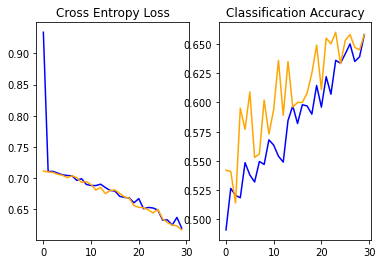

In [ ]:
from matplotlib import pyplot
# plot loss
pyplot.subplot(121)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(122)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

#Predict new images

In [ ]:
imagepath = '/content/cat.jpeg'

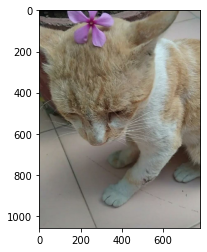

In [ ]:
img = mpimg.imread(imagepath)
plt.imshow(img)

In [ ]:
from PIL import Image
import numpy as np
predict = tf.keras.utils.load_img(imagepath, target_size = (150, 150))   
predict_modified = tf.keras.utils.img_to_array(predict)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = model.predict(predict_modified)
if result[0][0] >= 0.5:
    prediction = 'dog'
    probability = result[0][0]
    print ("probability = " + str(probability))
else:
    prediction = 'cat'
    probability = 1 - result[0][0]
    print ("probability = " + str(probability))
print("Prediction = " + prediction)

probability = 0.5768151879310608
Prediction = cat
